**Advanced-Data Analytics-MCA472A**

ETE-3
- **Reg no:** 2347153
- **Domain:** Airline Industry
- **Problem Statement:** Predicting flight prices based on various features like flight duration, stops, departure and arrival times, etc.


# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')


# Reading the dataset

In [2]:
data = pd.read_csv('/content/google_flights_data.csv')

# Exploratory Data Analysis (EDA)

In [3]:
data.head(10)

,date,route,company_name,flight_duration,price,co2_emission,stops,departure_time,arrival_time,departure_location,destination
0,2024-06-01,BLR-IXC,IndiGo,3 hr 5 min,$95,135 kg CO2e,Nonstop,4:45 AM.,7:50 AM.,BLR,IXC
1,2024-06-01,BLR-IXC,IndiGoOperated by Operated Under Wet Lease Fro...,4 hr 45 min,$104,172 kg CO2e,1 stop,8:00 AM.,12:45 PM.,BLR,IXC
2,2024-06-01,BLR-IXC,IndiGo,2 hr 45 min,$127,131 kg CO2e,Nonstop,3:55 PM.,6:40 PM.,BLR,IXC
3,2024-06-01,BLR-IXC,IndiGo,2 hr 45 min,$127,159 kg CO2e,Nonstop,8:30 PM.,11:15 PM.,BLR,IXC
4,2024-06-01,BLR-IXC,Vistara,3 hr 5 min,NaN,171 kg CO2e,Nonstop,11:30 AM.,2:35 PM.,BLR,IXC
5,2024-06-01,BLR-IXC,IndiGo,6 hr 5 min,$104,163 kg CO2e,1 stop,3:25 PM.,9:30 PM.,BLR,IXC
6,2024-06-01,BLR-IXC,IndiGo,5 hr 20 min,$107,166 kg CO2e,1 stop,1:00 PM.,6:20 PM.,BLR,IXC
7,2024-06-01,BLR-IXC,IndiGo,5 hr 30 min,$114,159 kg CO2e,1 stop,10:30 AM.,4:00 PM.,BLR,IXC
8,2024-06-01,BLR-IXC,IndiGo,3 hr 55 min,$139,162 kg CO2e,1 stop,7:40 AM.,11:35 AM.,BLR,IXC
9,2024-06-01,BLR-IXC,Air India,6 hr 35 min,NaN,198 kg CO2e,1 stop,3:25 PM.,10:00 PM.,BLR,IXC


In [4]:
data.tail(10)

,date,route,company_name,flight_duration,price,co2_emission,stops,departure_time,arrival_time,departure_location,destination
13300,2024-12-31,BLR-DEL,IndiGo,3 hr,$120,122 kg CO2e,Nonstop,8:30 PM.,11:30 PM.,BLR,DEL
13301,2024-12-31,BLR-DEL,Air India,2 hr 50 min,$125,156 kg CO2e,Nonstop,11:45 AM.,2:35 PM.,BLR,DEL
13302,2024-12-31,BLR-DEL,Air India,3 hr 5 min,$125,150 kg CO2e,Nonstop,3:25 PM.,6:30 PM.,BLR,DEL
13303,2024-12-31,BLR-DEL,Air India,2 hr 50 min,$125,156 kg CO2e,Nonstop,5:15 PM.,8:05 PM.,BLR,DEL
13304,2024-12-31,BLR-DEL,Air India,2 hr 50 min,$125,156 kg CO2e,Nonstop,7:30 PM.,10:20 PM.,BLR,DEL
13305,2024-12-31,BLR-DEL,Air India,3 hr,$125,180 kg CO2e,Nonstop,8:55 PM.,11:55 PM.,BLR,DEL
13306,2024-12-31,BLR-DEL,Air India,2 hr 55 min,$202,173 kg CO2e,Nonstop,7:10 AM.,10:05 AM.,BLR,DEL
13307,2024-12-31,BLR-DEL,SpiceJet,2 hr 45 min,$255,NaN,Nonstop,6:00 AM.,8:45 AM.,BLR,DEL
13308,2024-12-31,BLR-DEL,Vistara,2 hr 40 min,$350,154 kg CO2e,Nonstop,11:30 AM.,2:10 PM.,BLR,DEL
13309,2024-12-31,BLR-DEL,Air India,2 hr 50 min,$398,134 kg CO2e,Nonstop,1:20 PM.,4:10 PM.,BLR,DEL


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13310 entries, 0 to 13309
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                13310 non-null  object
 1   route               13310 non-null  object
 2   company_name        13310 non-null  object
 3   flight_duration     13310 non-null  object
 4   price               10341 non-null  object
 5   co2_emission        13071 non-null  object
 6   stops               13310 non-null  object
 7   departure_time      13310 non-null  object
 8   arrival_time        13310 non-null  object
 9   departure_location  13310 non-null  object
 10  destination         13310 non-null  object
dtypes: object(11)
memory usage: 1.1+ MB


In [6]:
data.describe()

,date,route,company_name,flight_duration,price,co2_emission,stops,departure_time,arrival_time,departure_location,destination
count,13310,13310,13310,13310,10341,13071,13310,13310,13310,13310,13310
unique,214,3,8,20,32,30,2,46,52,1,3
top,2024-10-17,BLR-DEL,IndiGo,2 hr 50 min,$112,122 kg CO2e,Nonstop,3:25 PM.,2:35 PM.,BLR,DEL
freq,102,8126,6411,4302,930,3107,10710,951,479,13310,8126


In [7]:
data.shape

(13310, 11)

In [8]:
# Unique values in categorical columns
print("Company name : " ,data['company_name'].unique())
print("Source location : " ,data['departure_location'].unique())
print("Destination : " ,data['destination'].unique())

Company name :  ['IndiGo' 'IndiGoOperated by Operated Under Wet Lease From Smartlynx'
 'Vistara' 'Air India' 'Air India Express' 'Etihad' 'Akasa Air' 'SpiceJet']
Source location :  ['BLR']
Destination :  ['IXC' 'JAI' 'DEL']


In [9]:
data.isnull().sum()

,0
date,0
route,0
company_name,0
flight_duration,0
price,2969
co2_emission,239
stops,0
departure_time,0
arrival_time,0
departure_location,0


- We see that there are missing values so we will remove them.
- Price : we will drop the rows with missing values.
- co2_emission : we will drop the column as it is not needed for our analysis.

# Removing the missing values

In [10]:
data.drop('co2_emission', axis=1, inplace=True)
data.dropna(subset=['price'], inplace=True)

In [11]:
data.isnull().sum()

,0
date,0
route,0
company_name,0
flight_duration,0
price,0
stops,0
departure_time,0
arrival_time,0
departure_location,0
destination,0


In [12]:
data.shape

(10341, 10)

# Converting to date time format

In [13]:
# converting to date time format
data['date'] = pd.to_datetime(data['date'])


In [14]:
# converting to date time format
# Ensure that 'departure_time' and 'arrival_time' are strings before applying string operations
data['departure_time'] = data['departure_time'].astype(str)
data['arrival_time'] = data['arrival_time'].astype(str)

# replace . with ''
data['departure_time'] = data['departure_time'].str.replace('.', '')
data['arrival_time'] = data['arrival_time'].str.replace('.', '')

# Check if 'departure_time' already contains datetime objects
if not isinstance(data['departure_time'].iloc[0], pd.Timestamp):
    # Convert to datetime, handling errors
    data['departure_time'] = pd.to_datetime(data['departure_time'], format='%I:%M %p', errors='coerce')  # Use %I for 12-hour format

# Check if 'arrival_time' already contains datetime objects
if not isinstance(data['arrival_time'].iloc[0], pd.Timestamp):
    data['arrival_time'] = pd.to_datetime(data['arrival_time'], format='%I:%M %p', errors='coerce')  # Use %I for 12-hour format

In [15]:
print(data.head(10))
data = data.dropna()

         date    route                                       company_name  \
0  2024-06-01  BLR-IXC                                             IndiGo   
1  2024-06-01  BLR-IXC  IndiGoOperated by Operated Under Wet Lease Fro...   
2  2024-06-01  BLR-IXC                                             IndiGo   
3  2024-06-01  BLR-IXC                                             IndiGo   
5  2024-06-01  BLR-IXC                                             IndiGo   
6  2024-06-01  BLR-IXC                                             IndiGo   
7  2024-06-01  BLR-IXC                                             IndiGo   
8  2024-06-01  BLR-IXC                                             IndiGo   
10 2024-06-02  BLR-IXC                                             IndiGo   
11 2024-06-02  BLR-IXC  IndiGoOperated by Operated Under Wet Lease Fro...   

   flight_duration price    stops      departure_time        arrival_time  \
0       3 hr 5 min   $95  Nonstop 1900-01-01 04:45:00 1900-01-01 07:50:00  

In [16]:
data.dtypes

,0
date,datetime64[ns]
route,object
company_name,object
flight_duration,object
price,object
stops,object
departure_time,datetime64[ns]
arrival_time,datetime64[ns]
departure_location,object
destination,object


# Sorting the data based on date

In [17]:
# sorting the data based on date
data = data.sort_values(by='date')

In [18]:
data.head(10)

,date,route,company_name,flight_duration,price,stops,departure_time,arrival_time,departure_location,destination
0,2024-06-01,BLR-IXC,IndiGo,3 hr 5 min,$95,Nonstop,1900-01-01 04:45:00,1900-01-01 07:50:00,BLR,IXC
5210,2024-06-01,BLR-DEL,SpiceJet,2 hr 45 min,$255,Nonstop,1900-01-01 06:00:00,1900-01-01 08:45:00,BLR,DEL
5209,2024-06-01,BLR-DEL,Air India,2 hr 50 min,$128,Nonstop,1900-01-01 19:30:00,1900-01-01 22:20:00,BLR,DEL
5208,2024-06-01,BLR-DEL,Air India,2 hr 50 min,$128,Nonstop,1900-01-01 17:15:00,1900-01-01 20:05:00,BLR,DEL
5207,2024-06-01,BLR-DEL,Air India,2 hr 50 min,$128,Nonstop,1900-01-01 11:45:00,1900-01-01 14:35:00,BLR,DEL
5206,2024-06-01,BLR-DEL,Air India,3 hr,$125,Nonstop,1900-01-01 20:55:00,1900-01-01 23:55:00,BLR,DEL
5205,2024-06-01,BLR-DEL,Air India,3 hr 5 min,$125,Nonstop,1900-01-01 15:25:00,1900-01-01 18:30:00,BLR,DEL
5204,2024-06-01,BLR-DEL,IndiGo,3 hr,$120,Nonstop,1900-01-01 20:30:00,1900-01-01 23:30:00,BLR,DEL
5202,2024-06-01,BLR-DEL,IndiGoOperated by Operated Under Wet Lease Fro...,2 hr 50 min,$112,Nonstop,1900-01-01 16:30:00,1900-01-01 19:20:00,BLR,DEL
5201,2024-06-01,BLR-DEL,IndiGo,2 hr 45 min,$112,Nonstop,1900-01-01 15:15:00,1900-01-01 18:00:00,BLR,DEL


In [19]:
data.tail(10)

,date,route,company_name,flight_duration,price,stops,departure_time,arrival_time,departure_location,destination
2392,2024-12-31,BLR-IXC,IndiGo,2 hr 45 min,$127,Nonstop,1900-01-01 15:55:00,1900-01-01 18:40:00,BLR,IXC
2391,2024-12-31,BLR-IXC,IndiGoOperated by Operated Under Wet Lease Fro...,4 hr 45 min,$104,1 stop,1900-01-01 08:00:00,1900-01-01 12:45:00,BLR,IXC
2390,2024-12-31,BLR-IXC,IndiGo,3 hr 5 min,$95,Nonstop,1900-01-01 04:45:00,1900-01-01 07:50:00,BLR,IXC
13276,2024-12-31,BLR-DEL,Air India,2 hr 50 min,$88,Nonstop,1900-01-01 09:50:00,1900-01-01 12:40:00,BLR,DEL
13277,2024-12-31,BLR-DEL,IndiGo,2 hr 45 min,$90,Nonstop,1900-01-01 08:00:00,1900-01-01 10:45:00,BLR,DEL
13278,2024-12-31,BLR-DEL,Akasa Air,2 hr 50 min,$93,Nonstop,1900-01-01 04:30:00,1900-01-01 07:20:00,BLR,DEL
13279,2024-12-31,BLR-DEL,Vistara,2 hr 40 min,$99,Nonstop,1900-01-01 19:40:00,1900-01-01 22:20:00,BLR,DEL
13281,2024-12-31,BLR-DEL,IndiGo,2 hr 45 min,$90,Nonstop,1900-01-01 07:00:00,1900-01-01 09:45:00,BLR,DEL
2395,2024-12-31,BLR-IXC,IndiGo,6 hr 5 min,$104,1 stop,1900-01-01 15:25:00,1900-01-01 21:30:00,BLR,IXC
13309,2024-12-31,BLR-DEL,Air India,2 hr 50 min,$398,Nonstop,1900-01-01 13:20:00,1900-01-01 16:10:00,BLR,DEL


- Convert 'price' column to numeric type

In [20]:

import pandas as pd
data['price'] = data['price'].astype(str).str.replace('$', '')
data['price'] = pd.to_numeric(data['price'])

data.head(10)


,date,route,company_name,flight_duration,price,stops,departure_time,arrival_time,departure_location,destination
0,2024-06-01,BLR-IXC,IndiGo,3 hr 5 min,95,Nonstop,1900-01-01 04:45:00,1900-01-01 07:50:00,BLR,IXC
5210,2024-06-01,BLR-DEL,SpiceJet,2 hr 45 min,255,Nonstop,1900-01-01 06:00:00,1900-01-01 08:45:00,BLR,DEL
5209,2024-06-01,BLR-DEL,Air India,2 hr 50 min,128,Nonstop,1900-01-01 19:30:00,1900-01-01 22:20:00,BLR,DEL
5208,2024-06-01,BLR-DEL,Air India,2 hr 50 min,128,Nonstop,1900-01-01 17:15:00,1900-01-01 20:05:00,BLR,DEL
5207,2024-06-01,BLR-DEL,Air India,2 hr 50 min,128,Nonstop,1900-01-01 11:45:00,1900-01-01 14:35:00,BLR,DEL
5206,2024-06-01,BLR-DEL,Air India,3 hr,125,Nonstop,1900-01-01 20:55:00,1900-01-01 23:55:00,BLR,DEL
5205,2024-06-01,BLR-DEL,Air India,3 hr 5 min,125,Nonstop,1900-01-01 15:25:00,1900-01-01 18:30:00,BLR,DEL
5204,2024-06-01,BLR-DEL,IndiGo,3 hr,120,Nonstop,1900-01-01 20:30:00,1900-01-01 23:30:00,BLR,DEL
5202,2024-06-01,BLR-DEL,IndiGoOperated by Operated Under Wet Lease Fro...,2 hr 50 min,112,Nonstop,1900-01-01 16:30:00,1900-01-01 19:20:00,BLR,DEL
5201,2024-06-01,BLR-DEL,IndiGo,2 hr 45 min,112,Nonstop,1900-01-01 15:15:00,1900-01-01 18:00:00,BLR,DEL


# Graphs (Visualizing the dataset)

- Pie chart for number of flights for each company

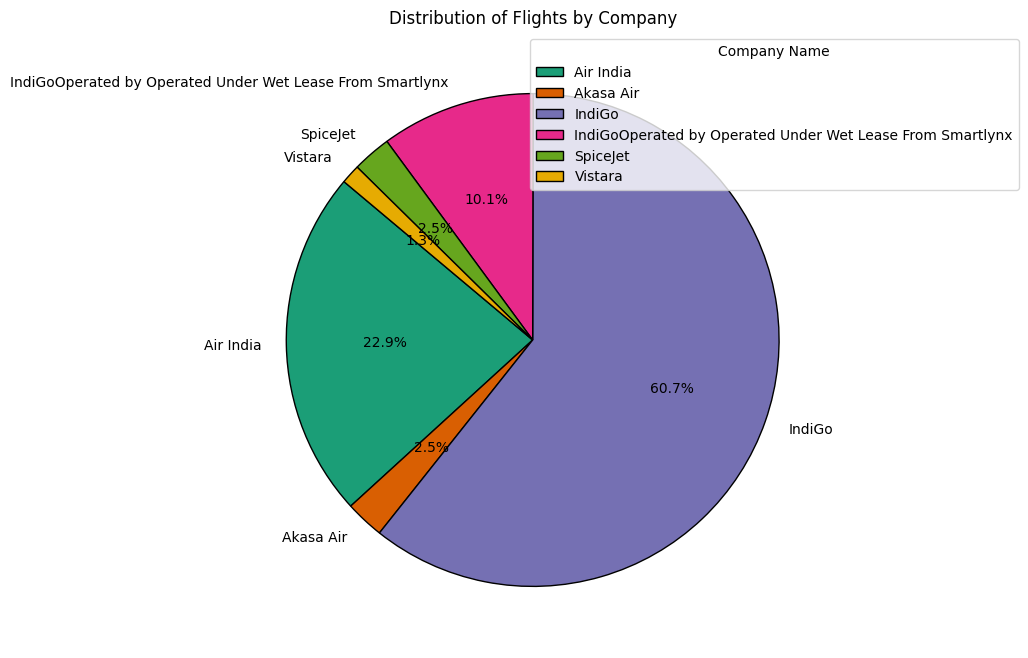

In [21]:
# Grouping by company_name to count the number of flights for each company
company_counts = data.groupby('company_name').size()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('Dark2')

plt.pie(company_counts, labels=company_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Adding a title and legend
plt.title('Distribution of Flights by Company')
plt.legend(title='Company Name', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

- Bar Graph of routes Vs no. of flights

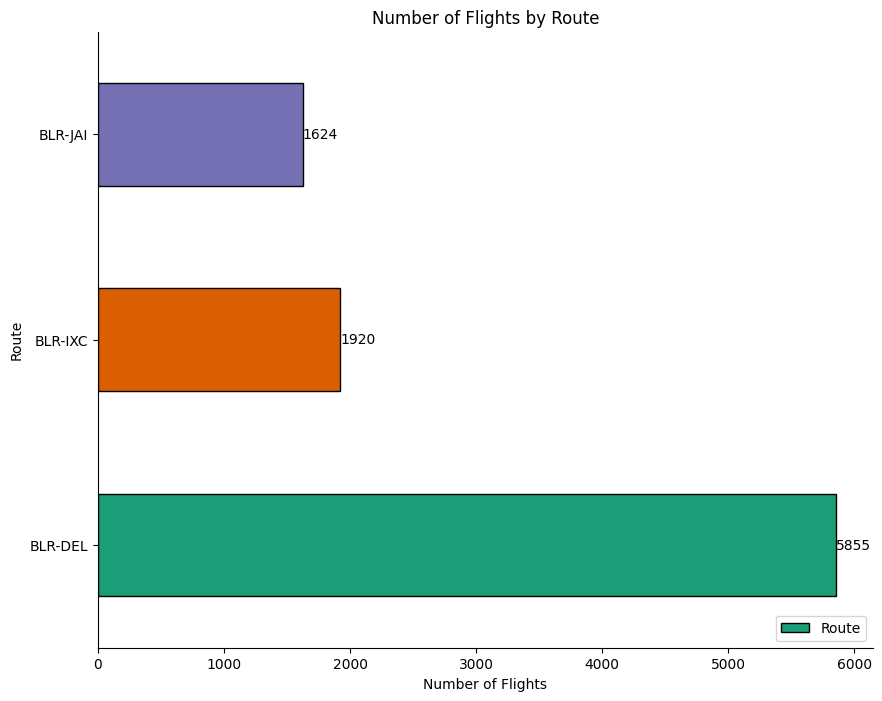

In [22]:
# Grouping by route to count the number of flights for each route
route_counts = data.groupby('route').size()

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 8))
colors = sns.color_palette('Dark2')  # Using the 'Dark2' palette for consistency

ax = route_counts.plot(kind='barh', color=colors, edgecolor='black')

# Adding the numbers to each bar
for index, value in enumerate(route_counts):
    ax.text(value, index, f'{value}', va='center')

# Adding a title, labels, and legend
plt.title('Number of Flights by Route')
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.gca().spines[['top', 'right']].set_visible(False)

# Creating a custom legend (if needed, although it's not typical for a bar chart with labeled bars)
plt.legend(['Route'], loc='lower right')


- Graph for each flight company and number of flights for ndifferent routes

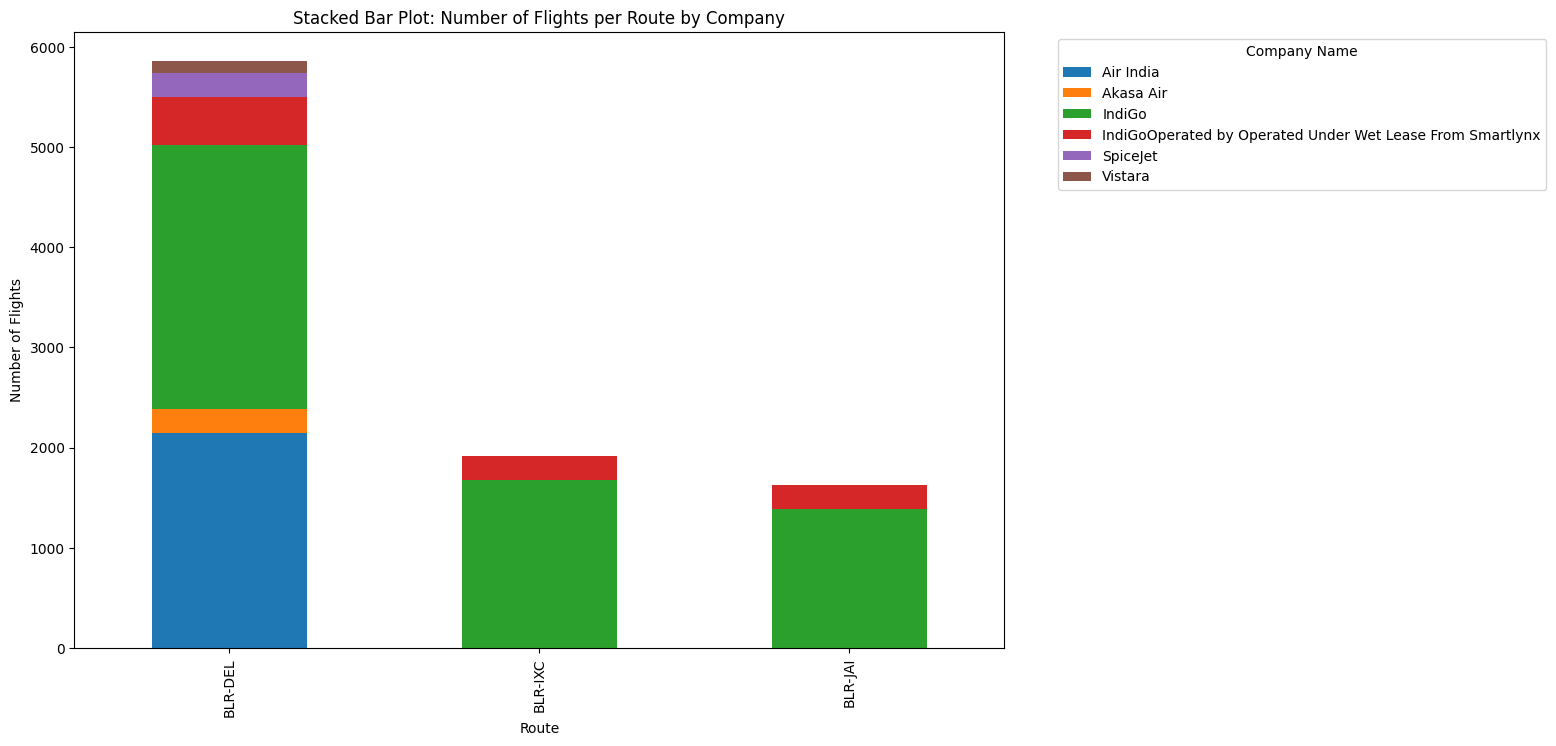

In [23]:
# Pivoting the data for stacked bar plot
route_company_counts = data.groupby(['route', 'company_name']).size().reset_index(name='counts')
route_company_pivot = route_company_counts.pivot(index='route', columns='company_name', values='counts').fillna(0)

route_company_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Plot: Number of Flights per Route by Company')
plt.xlabel('Route')
plt.ylabel('Number of Flights')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

# Encoding categorical columns

  - *Company_name*
    - 0: Air India,
    - 1: Akasa air,
    - 2: Etihad,
    - 3:Indigo,
    - 4:IndiGo Operated Under Wet Lease From Smartlynx,
    - 5:Spice Jet,
    - 6: Vistara
  - *departure_location*
    - 0: Bangalore
  - *destination*
   - 0: DEL,
   - 1:IXC,
   - 2:JAI
  - *stop*
   - 0: Nonstop,
   - 1: 1 STOP
   
- *route*
  - 0: BLR-DEL,
  - 1: BLR-IXC,
  - 2: BLR-JAI

In [24]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['company_name'] = label_encoder.fit_transform(data['company_name'])
# 0: Air India, 1: Akasa air, 2: Etihad, 3:Indigo, 4:IndiGoOperated by Operated Under Wet Lease From Smartlynx, 5:Spice Jet, 6: Vistara
data['departure_location'] = label_encoder.fit_transform(data['departure_location'])
# 0: Bangalore
data['destination'] = label_encoder.fit_transform(data['destination'])
# 0: DEL, 1:IXC, 2:JAI
data['stops'] = label_encoder.fit_transform(data['stops'])
# 0: Nonstop, 1: 1 STOP
data['route'] = label_encoder.fit_transform(data['route'])
# 0: BLR-DEL, 1: BLR-IXC, 2: BLR-JAI

data.head(10)

,date,route,company_name,flight_duration,price,stops,departure_time,arrival_time,departure_location,destination
0,2024-06-01,1,2,3 hr 5 min,95,1,1900-01-01 04:45:00,1900-01-01 07:50:00,0,1
5210,2024-06-01,0,4,2 hr 45 min,255,1,1900-01-01 06:00:00,1900-01-01 08:45:00,0,0
5209,2024-06-01,0,0,2 hr 50 min,128,1,1900-01-01 19:30:00,1900-01-01 22:20:00,0,0
5208,2024-06-01,0,0,2 hr 50 min,128,1,1900-01-01 17:15:00,1900-01-01 20:05:00,0,0
5207,2024-06-01,0,0,2 hr 50 min,128,1,1900-01-01 11:45:00,1900-01-01 14:35:00,0,0
5206,2024-06-01,0,0,3 hr,125,1,1900-01-01 20:55:00,1900-01-01 23:55:00,0,0
5205,2024-06-01,0,0,3 hr 5 min,125,1,1900-01-01 15:25:00,1900-01-01 18:30:00,0,0
5204,2024-06-01,0,2,3 hr,120,1,1900-01-01 20:30:00,1900-01-01 23:30:00,0,0
5202,2024-06-01,0,3,2 hr 50 min,112,1,1900-01-01 16:30:00,1900-01-01 19:20:00,0,0
5201,2024-06-01,0,2,2 hr 45 min,112,1,1900-01-01 15:15:00,1900-01-01 18:00:00,0,0


In [25]:
data.dtypes

,0
date,datetime64[ns]
route,int64
company_name,int64
flight_duration,object
price,int64
stops,int64
departure_time,datetime64[ns]
arrival_time,datetime64[ns]
departure_location,int64
destination,int64


In [26]:
data['departure_time'] = pd.to_datetime(data['departure_time'])

# Extract hour from departure_time
data['hour'] = data['departure_time'].dt.hour

# Categorize time of day
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening/Night'

data['time_category'] = data['hour'].apply(categorize_time)

- price trends by different time of the day

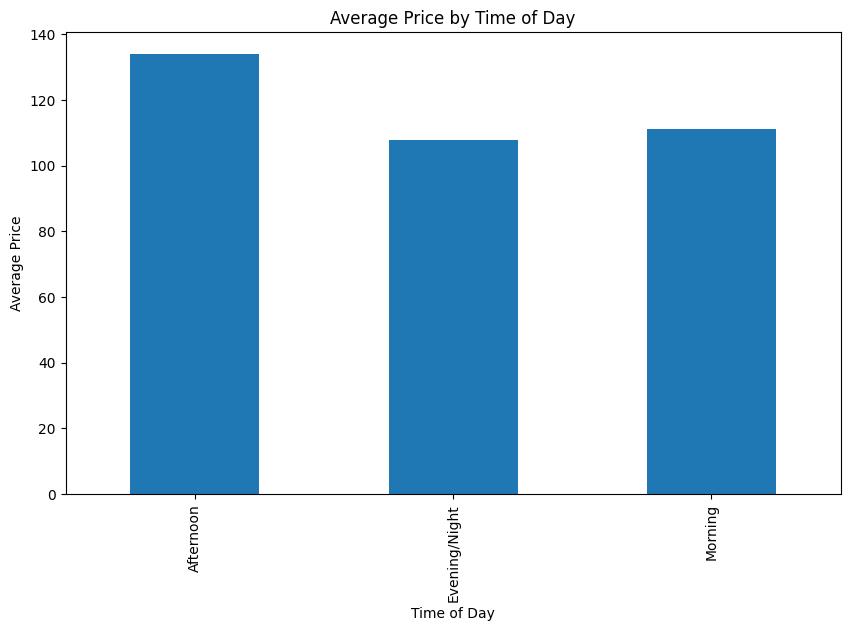

In [27]:
# Analyze price trends by time of day

price_by_time = data.groupby('time_category')['price'].mean()
plt.figure(figsize=(10, 6))
price_by_time.plot(kind='bar')
plt.title('Average Price by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Price')
plt.show()

# converting flight duration in minutes

In [28]:
# Function to convert flight duration to minutes
def duration_to_minutes(duration):
    hours, minutes = 0, 0
    if 'hr' in duration:
        parts = duration.split(' hr')
        hours = int(parts[0].strip())
        if 'min' in parts[1]:
            minutes = int(parts[1].split(' min')[0].strip())
    elif 'min' in duration:
        minutes = int(duration.split(' min')[0].strip())
    return hours * 60 + minutes

# Apply the function
data['flight_duration_minutes'] = data['flight_duration'].apply(duration_to_minutes)

data.head(10)

,date,route,company_name,flight_duration,price,stops,departure_time,arrival_time,departure_location,destination,hour,time_category,flight_duration_minutes
0,2024-06-01,1,2,3 hr 5 min,95,1,1900-01-01 04:45:00,1900-01-01 07:50:00,0,1,4,Evening/Night,185
5210,2024-06-01,0,4,2 hr 45 min,255,1,1900-01-01 06:00:00,1900-01-01 08:45:00,0,0,6,Morning,165
5209,2024-06-01,0,0,2 hr 50 min,128,1,1900-01-01 19:30:00,1900-01-01 22:20:00,0,0,19,Evening/Night,170
5208,2024-06-01,0,0,2 hr 50 min,128,1,1900-01-01 17:15:00,1900-01-01 20:05:00,0,0,17,Evening/Night,170
5207,2024-06-01,0,0,2 hr 50 min,128,1,1900-01-01 11:45:00,1900-01-01 14:35:00,0,0,11,Morning,170
5206,2024-06-01,0,0,3 hr,125,1,1900-01-01 20:55:00,1900-01-01 23:55:00,0,0,20,Evening/Night,180
5205,2024-06-01,0,0,3 hr 5 min,125,1,1900-01-01 15:25:00,1900-01-01 18:30:00,0,0,15,Afternoon,185
5204,2024-06-01,0,2,3 hr,120,1,1900-01-01 20:30:00,1900-01-01 23:30:00,0,0,20,Evening/Night,180
5202,2024-06-01,0,3,2 hr 50 min,112,1,1900-01-01 16:30:00,1900-01-01 19:20:00,0,0,16,Afternoon,170
5201,2024-06-01,0,2,2 hr 45 min,112,1,1900-01-01 15:15:00,1900-01-01 18:00:00,0,0,15,Afternoon,165


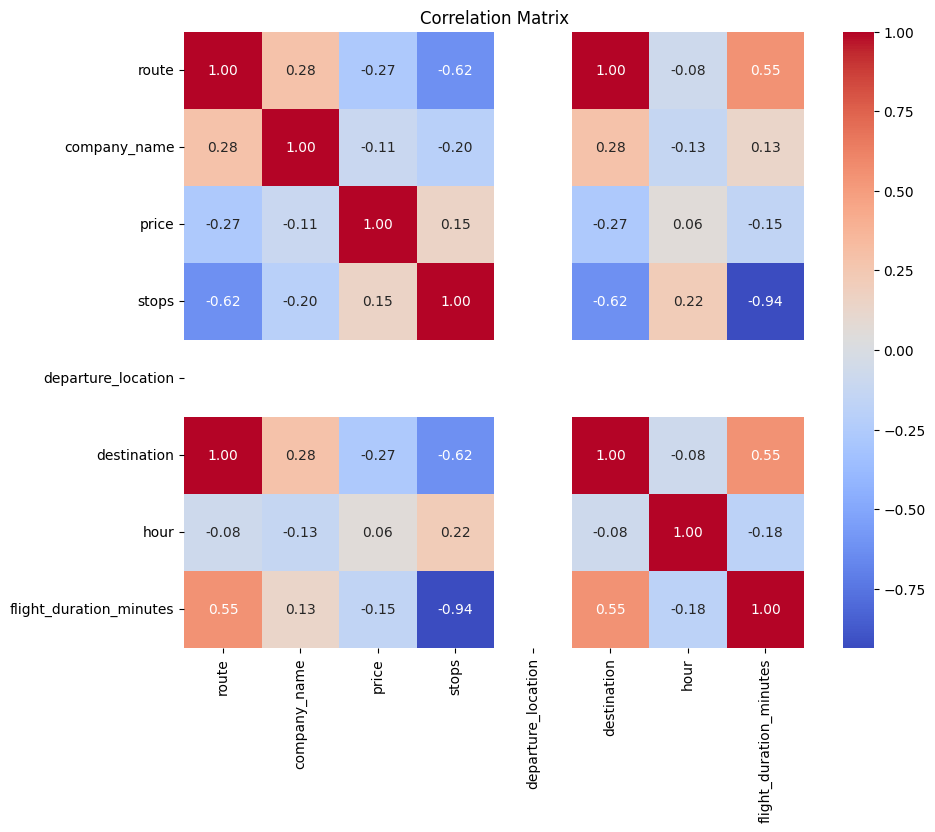

In [29]:
# Calculate the correlation matrix, excluding non-numeric columns
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Simple Linear Regression

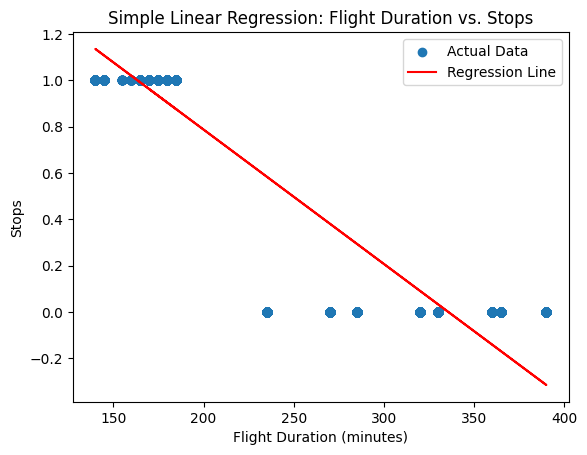

In [30]:
import matplotlib.pyplot as plt
# Extract the relevant columns for simple linear regression
X = data['flight_duration_minutes'].values.reshape(-1, 1)
y = data['stops'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Flight Duration (minutes)')
plt.ylabel('Stops')
plt.title('Simple Linear Regression: Flight Duration vs. Stops')
plt.legend()
plt.show()


In [31]:
# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0217244141616841
R-squared: 0.875964613384269


In [32]:
# print coefficiants
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.00579933]
Intercept: 1.9471592261518138


Interpretation of Simple Linear Regression Results

**Coefficients:** The coefficient for 'flight_duration_minutes' is [-0.00579933]. This indicates that, on average, for every additional minute of flight duration, the number of stops is expected to increase/decrease by [-0.00579933].

**Intercept:** The intercept is 1.9471592261518138
. This represents the estimated number of stops when the flight duration is zero minutes. However, in this context, a flight duration of zero minutes is not practically meaningful.

**Mean Squared Error (MSE):** The MSE is 0.0217244141616841. This measures the average squared difference between the actual number of stops and the predicted number of stops. A lower MSE indicates a better fit of the model to the data.

**R-squared:** The R-squared value is 0.875964613384269. This represents the proportion of the variance in the number of stops that is explained by the flight duration. A higher R-squared value indicates a better fit of the model.

**Overall Interpretation:** Based on these results, there appears to be a *strong negative* linear relationship between flight duration and the number of stops. However, it's important to note that simple linear regression may not be the most appropriate model for this data, as the relationship may not be strictly linear and other factors may influence the number of stops.


# Multiple Linear regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = data[['flight_duration_minutes', 'stops', 'company_name','route']]
y = data['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print('Linear Regression:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lr))
print('R^2 Score:', r2_score(y_test, y_pred_lr))


Linear Regression:
Mean Squared Error: 2888.436642491323
R^2 Score: 0.07816846487759255


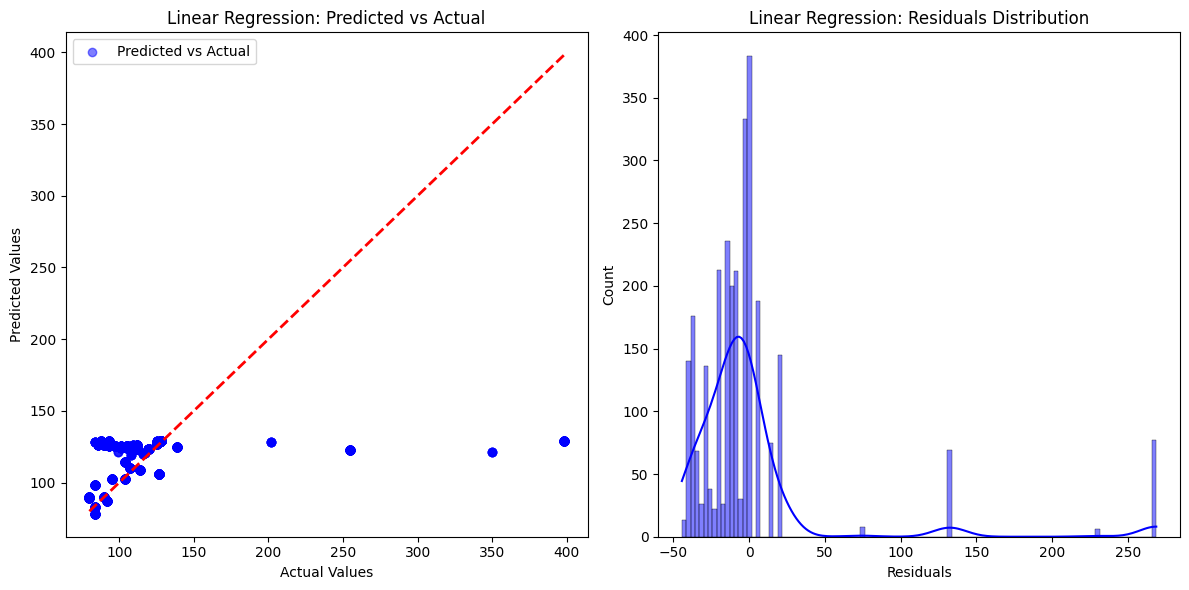

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Predicted vs Actual Values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs Actual')
plt.legend()

# Plot Residuals
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_lr, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Linear Regression: Residuals Distribution')

plt.tight_layout()
plt.show()


In [35]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
print(coefficients)

                   Feature  Coefficient
0  flight_duration_minutes    -0.169329
1                    stops   -30.699139
2             company_name    -1.901869
3                    route   -20.339212





Interpretation:
- For every minute increase in flight duration, the price is expected to increase by (-0.120477).
- Flights with one stop are expected to be (-30.699139) more expensive than nonstop flights.
- The base price for Air India is the intercept.
- Other companies have prices adjusted by their respective coefficients compared to Air India.




# Decision tree Regression

In [36]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print('Decision Tree Regression:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_dt))
print('R^2 Score:', r2_score(y_test, y_pred_dt))
print('Mean Absolute Error:', np.mean(np.abs(y_test - y_pred_dt)))


Decision Tree Regression:
Mean Squared Error: 1997.9599241153835
R^2 Score: 0.36236009581578854
Mean Absolute Error: 15.076016144440107


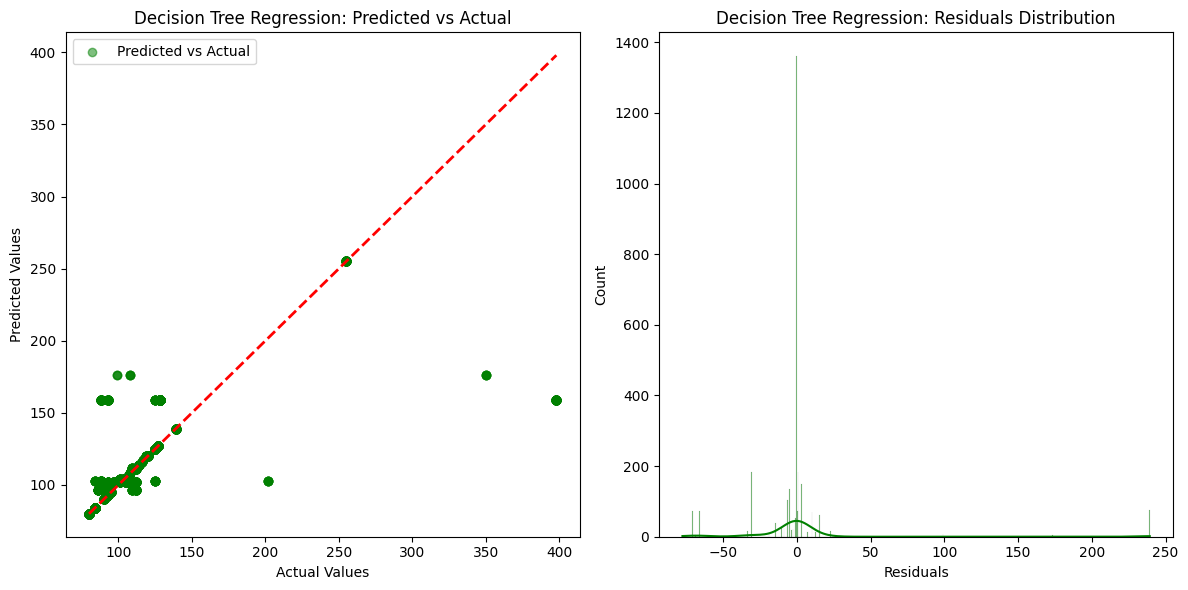

In [37]:
# Plot Predicted vs Actual Values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_dt, color='green', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression: Predicted vs Actual')
plt.legend()

# Plot Residuals
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_dt, kde=True, color='green')
plt.xlabel('Residuals')
plt.title('Decision Tree Regression: Residuals Distribution')

plt.tight_layout()
plt.show()



In [38]:
# print coeeficiants
print("Feature Importances:", dt_model.feature_importances_)
print("Tree Depth:", dt_model.get_depth())
print("Number of Nodes:", dt_model.tree_.node_count)
print("Number of Leaf Nodes:", dt_model.tree_.n_leaves)


Feature Importances: [0.14311443 0.0008922  0.77911833 0.07687504]
Tree Depth: 8
Number of Nodes: 55
Number of Leaf Nodes: 28




Interpretations of Decision Tree Regression Results

**Mean Squared Error (MSE):**  
The MSE measures the average squared difference between predicted and actual values. A lower MSE indicates better model fit.

**R-squared (R^2):**  
R-squared represents the proportion of variance in the target variable explained by the model. A higher R^2 indicates a better fit, with 1 being a perfect fit.

**Mean Absolute Error (MAE):**
MAE measures the average absolute difference between predicted and actual values. It's less sensitive to outliers compared to MSE.

**Predicted vs Actual Plot:**
This plot visually compares the predicted prices against the actual prices. Ideally, points should be close to the diagonal line, indicating accurate predictions.

**Residuals Distribution Plot:**
The residuals (difference between actual and predicted values) should ideally be normally distributed around zero. This indicates that the model's errors are random and not systematically biased.

**Interpreting the Decision Tree:**
- Unlike linear regression, decision trees don't have simple coefficients to interpret.
- Instead, the model creates a tree-like structure with decision nodes based on features.
- To understand the model, you can visualize the tree or analyze feature importances.




# Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print('Random Forest Regression:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))
print('R^2 Score:', r2_score(y_test, y_pred_rf))
print('Mean Absolute Error:', np.mean(np.abs(y_test - y_pred_rf)))


Random Forest Regression:
Mean Squared Error: 1997.002697602648
R^2 Score: 0.3626655903427288
Mean Absolute Error: 15.127543006934228


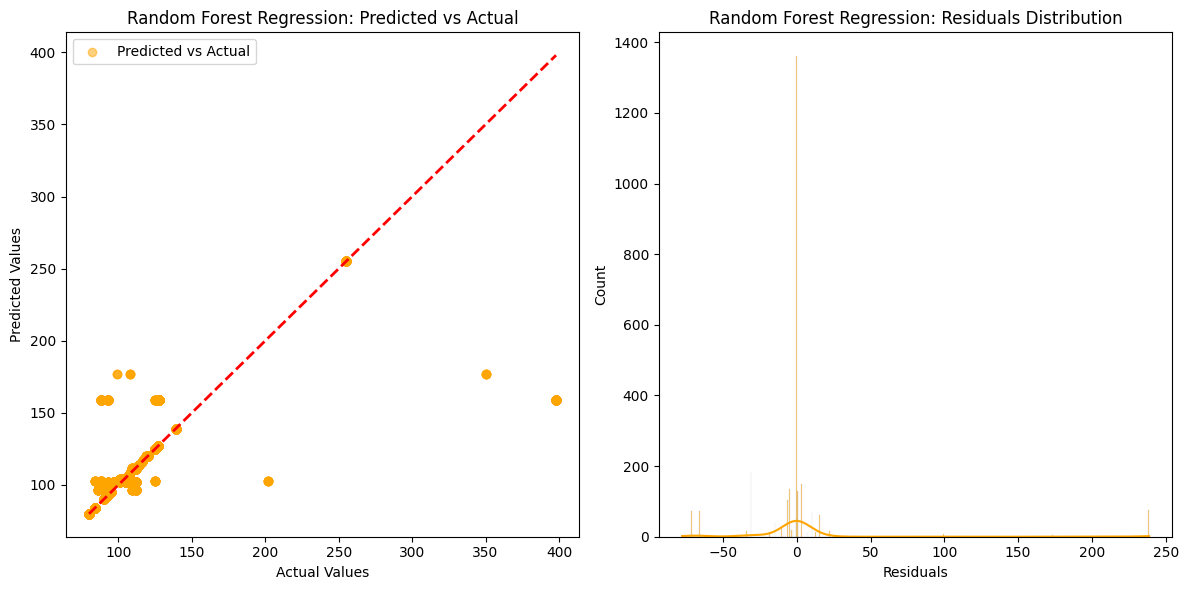

In [40]:
# Plot Predicted vs Actual Values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, color='orange', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Predicted vs Actual')
plt.legend()

# Plot Residuals
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_rf, kde=True, color='orange')
plt.xlabel('Residuals')
plt.title('Random Forest Regression: Residuals Distribution')

plt.tight_layout()
plt.show()


In [41]:

# Feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importances)


                   Feature  Importance
2             company_name    0.779515
0  flight_duration_minutes    0.139756
3                    route    0.076238
1                    stops    0.004491




Interpretations of Random Forest Regression Results

* Mean Squared Error (MSE):
The MSE measures the average squared difference between predicted and actual values. A lower MSE indicates a better model fit.

* R-squared (R^2):
R-squared represents the proportion of variance in the target variable explained by the model. A higher R^2 indicates a better fit, with 1 being a perfect fit.

* Mean Absolute Error (MAE):
MAE measures the average absolute difference between predicted and actual values. It's less sensitive to outliers compared to MSE.

* Predicted vs Actual Plot:
This plot visually compares the predicted prices against the actual prices. Ideally, points should be close to the diagonal line, indicating accurate predictions.

* Residuals Distribution Plot:
The residuals (difference between actual and predicted values) should ideally be normally distributed around zero. This indicates that the model's errors are random and not systematically biased.

* Feature Importances:
This table shows the relative importance of each feature in the Random Forest model. Higher importance values indicate that the feature has a stronger influence on the predicted price.

* Overall Interpretation:
Based on the evaluation metrics (MSE, R^2, MAE) and the visual plots, the Random Forest Regression model appears to be a good fit for predicting flight prices. The feature importances can provide insights into which factors are most important in determining flight prices.


# Support Vector Regression (SVR)

In [42]:
from sklearn.svm import SVR

# Train the model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluate
print('Support Vector Regression:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_svr))
print('R^2 Score:', r2_score(y_test, y_pred_svr))
print('Mean Absolute Error:', np.mean(np.abs(y_test - y_pred_svr)))


Support Vector Regression:
Mean Squared Error: 3241.981392194215
R^2 Score: -0.03466374842378106
Mean Absolute Error: 23.760040445620035


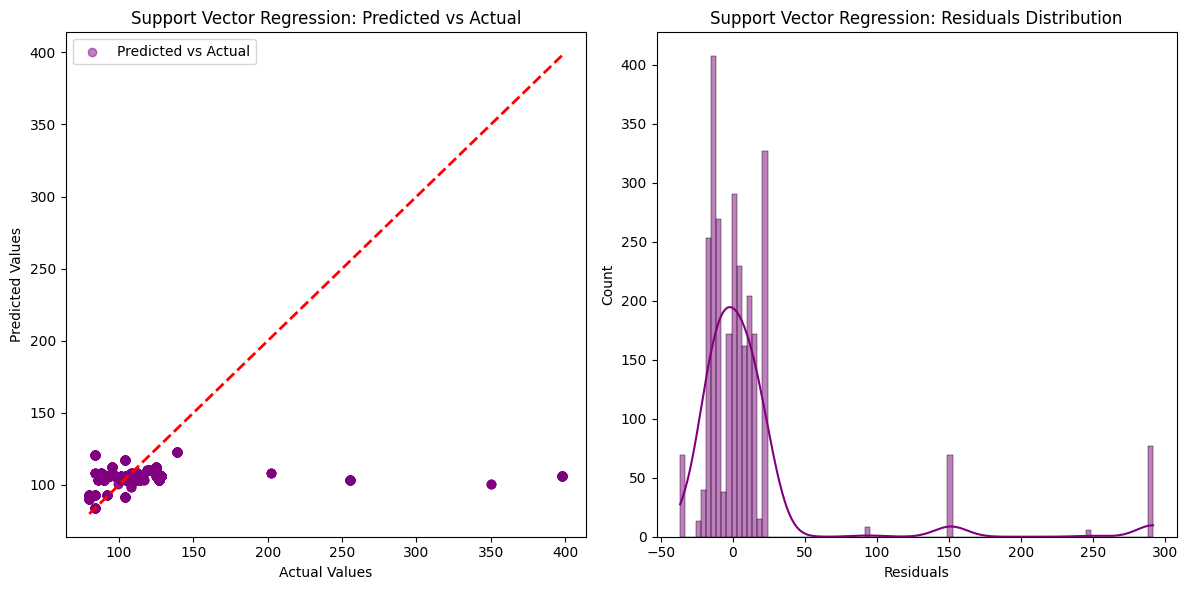

In [43]:
# Plot Predicted vs Actual Values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svr, color='purple', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Support Vector Regression: Predicted vs Actual')
plt.legend()

# Plot Residuals
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_svr, kde=True, color='purple')
plt.xlabel('Residuals')
plt.title('Support Vector Regression: Residuals Distribution')

plt.tight_layout()
plt.show()


In [44]:
# print the coeeficiants
print("Support Vectors:", svr_model.support_vectors_)
print("Number of Support Vectors:", svr_model.n_support_)
print("Support Vector Indices:", svr_model.support_)
print("Number of Features:", svr_model.n_features_in_)


Support Vectors: [[390.   0.   2.   2.]
 [175.   1.   2.   0.]
 [170.   1.   2.   0.]
 ...
 [390.   0.   2.   2.]
 [320.   0.   2.   2.]
 [165.   1.   2.   0.]]
Number of Support Vectors: [6460]
Support Vector Indices: [   0    1    2 ... 6576 6577 6578]
Number of Features: 4




Interpretations of Support Vector Regression (SVR) Results

* Mean Squared Error (MSE):
Similar to other regression models, MSE measures the average squared difference between predicted and actual prices. A lower MSE suggests better model fit.

* R-squared (R^2):
R-squared indicates the proportion of variance in the target variable (price) explained by the SVR model. A higher R^2 value (closer to 1) indicates a better fit.

* Mean Absolute Error (MAE):
MAE represents the average absolute difference between predicted and actual prices. It's less sensitive to outliers compared to MSE.

* Predicted vs Actual Plot:
This visualization helps assess the model's accuracy by comparing predicted prices against actual prices. Ideally, points should cluster closely around the diagonal line, indicating accurate predictions.

* Residuals Distribution Plot:
The residuals (difference between actual and predicted values) should ideally be normally distributed around zero. This suggests that the model's errors are random and not systematically biased.

Interpreting SVR:
- SVR is a more complex model compared to linear regression.
- It finds a hyperplane that best fits the data while allowing for some errors (controlled by the epsilon parameter).
- The kernel function (e.g., 'rbf' for radial basis function) influences how data is transformed to find this hyperplane.
- Interpreting the coefficients in SVR is not as straightforward as in linear regression due to the kernel transformation.



               Model          MSE       R^2
0  Linear Regression  2888.436642  0.078168
1      Decision Tree  1997.959924  0.362360
2      Random Forest  1997.002698  0.362666
3     Support Vector  3241.981392 -0.034664


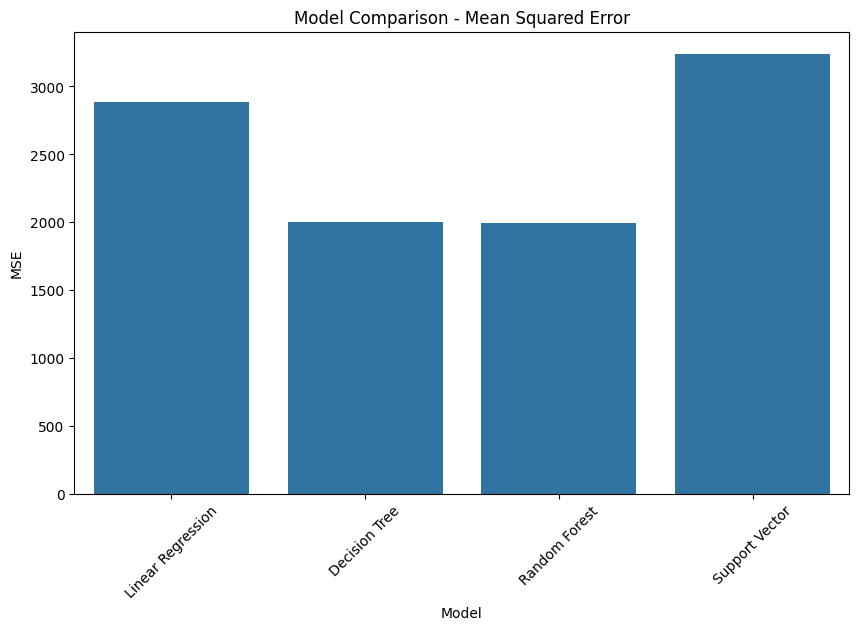

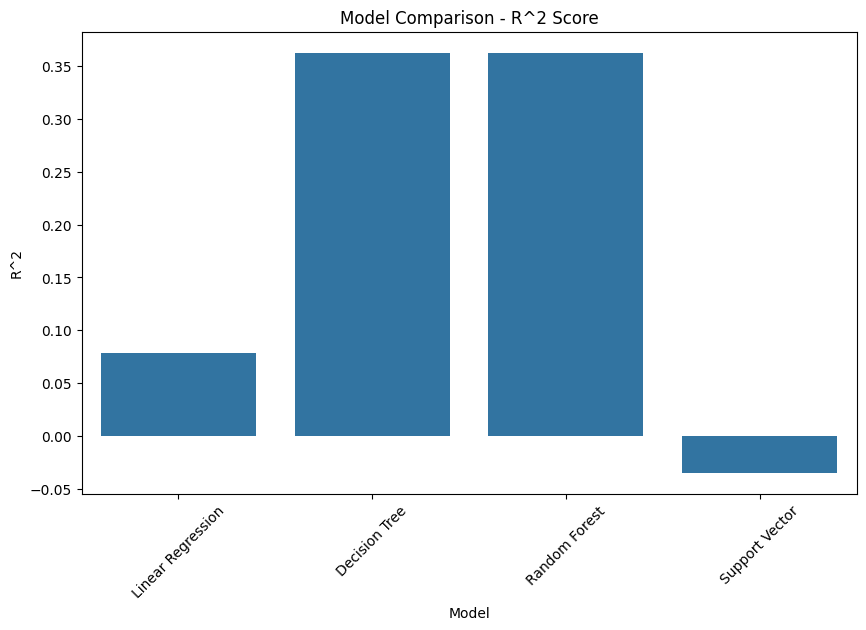


Model Performance Comparison:
----------------------------
Linear Regression:
  - MSE: 2888.44
  - R^2: 0.08

Decision Tree:
  - MSE: 1997.96
  - R^2: 0.36

Random Forest:
  - MSE: 1997.00
  - R^2: 0.36

Support Vector:
  - MSE: 3241.98
  - R^2: -0.03

Based on MSE, the best performing model is: Random Forest


In [45]:
# Model Comparison
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector']
mse_scores = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_dt),
    mean_squared_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred_svr)
]
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_dt),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_svr)
]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'R^2': r2_scores
})

print(comparison_df)

# Plot MSE scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=comparison_df)
plt.title('Model Comparison - Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

# Plot R^2 scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R^2', data=comparison_df)
plt.title('Model Comparison - R^2 Score')
plt.xticks(rotation=45)
plt.show()

# Interpretation
print("\nModel Performance Comparison:")
print("----------------------------")
for i, model in enumerate(models):
    print(f"{model}:")
    print(f"  - MSE: {mse_scores[i]:.2f}")
    print(f"  - R^2: {r2_scores[i]:.2f}")
    print()

best_model = comparison_df.loc[comparison_df['MSE'].idxmin()]['Model']
print(f"Based on MSE, the best performing model is: {best_model}")


